In [1]:
%cd drive/MyDrive/DataMining/hw2

/content/drive/MyDrive/DataMining/hw2


# <div dir="rtl"> سوال چهارم</div>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart_diagnose.csv")

In [4]:
df.head()

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

## <div dir="rtl"> قسمت اول</div>

<div dir="rtl">

در دو سلول زیر نمودار overlay بین ویژگی سن و برچسب داده در حالت اسکیل نشده رسم شده است. 

این طور که به نظر میرسد در سنین جوانی بیماری قلبی در نسبت خیلی کمی از افراد مشاهده میشود .

این نسبت در افراد میانسال کمی بیشتر میشود اما همچنان کمتر از نیمی از جمعیت است.

نهایتا در افراد کهنسال مشاهده میشود که جمعیت حداکثری به بیماری قلبی مبتلا هستند.


<div>

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


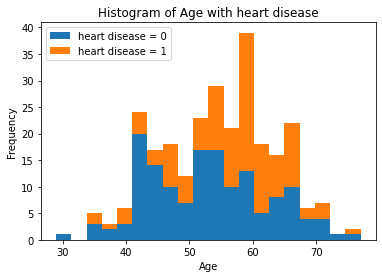

In [6]:
plt.hist([df[df['heart disease']==0]['age'], df[df['heart disease']==1]['age']], 
         bins=20, stacked=True)
plt.legend(['heart disease = 0', 'heart disease = 1'])
plt.title('Histogram of Age with heart disease')
plt.xlabel('Age'); plt.ylabel('Frequency'); plt.show()

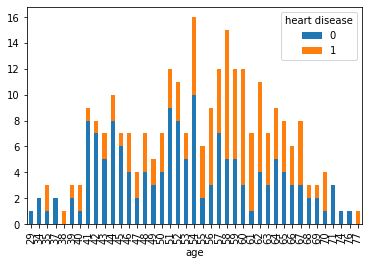

In [7]:
crosstab_01 = pd.crosstab(df['age'], df['heart disease'])
crosstab_01.plot(kind='bar', stacked=True)

## <div dir="rtl"> قسمت دوم</div>

<div dir="rtl">

در دو سلول زیر نمودار overlay بین ویژگی سن و برچسب داده در حالت اسکیل شده رسم شده است. 

این طور که به نظر میرسد در سنین جوانی بیماری قلبی در نسبت خیلی کمی از افراد مشاهده میشود .

این نسبت در افراد میانسال کمی بیشتر میشود اما همچنان کمتر از نیمی از جمعیت است.

نهایتا در افراد کهنسال مشاهده میشود که جمعیت حداکثری به بیماری قلبی مبتلا هستند.

لازم به ذکر است که این روابط در اکثر سنین یک گروه وجود دارد و ممکن است در بعضی از سنین رفتار غیر هماهنگی با بقیه سنین آن گروه مشاهده شود که طبیعی است.

نتیجه برداشت شده از این قسمت با قسمت قبلی مشابه است اگرچه برداشت این تایج از نمودار اسکیل شده بسیار راحتتر و روشن تر است.

<div>

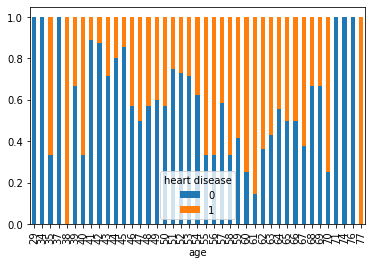

In [8]:
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis=0)
crosstab_norm.plot(kind='bar', stacked=True)

## <div dir="rtl"> قسمت سوم</div>

<div dir="rtl">

افراد را به سه قسمت جوان، میانسال و کهنسال تقسیم بندی میکنیم:


<div>

In [9]:
df['age_binned'] = pd.cut(x=df['age'], bins=[0,45, 53, 80], labels=['low', 'medium', 'high'])

## <div dir="rtl"> قسمت چهارم</div>

<div dir="rtl">

مشاهده میشود که در گروه جوان کمتر از یک چهارم افراد به بیماری قلبی مبتلا هستند.

در افراد میانسال کمتر از نیمی از افراد و چیزی حدود یک سوم افراد به بیماری قلبی مبتلا هستند.

و نهایتا در گروه تفراد کهنسال بیش از نیمی از افراد به بیماری قلبی مبتلا هستند.


<div>

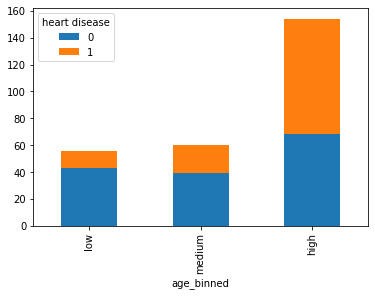

In [10]:
crosstab_02 = pd.crosstab(df['age_binned'], df['heart disease'])
crosstab_02.plot(kind='bar', stacked=True)

## <div dir="rtl"> قسمت پنجم</div>

<div dir="rtl">

مشاهده میشود که در گروه جوان کمتر از یک چهارم افراد به بیماری قلبی مبتلا هستند.

در افراد میانسال کمتر از نیمی از افراد و چیزی حدود یک سوم افراد به بیماری قلبی مبتلا هستند.

و نهایتا در گروه تفراد کهنسال بیش از نیمی از افراد به بیماری قلبی مبتلا هستند.

نتایج برداشت شده از این قسمت با قسمت قبلی هماهنگ است، هر چند نتیجه گیری از نمودار فعلی نسبت به حالت قبلی بسیار ساده تر و روشن تر است.

<div>

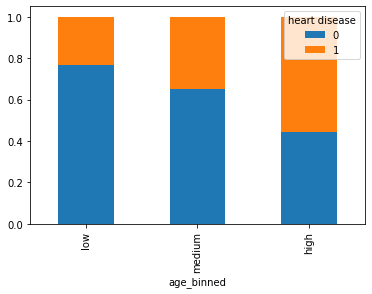

In [11]:
crosstab_norm2 = crosstab_02.div(crosstab_02.sum(1), axis=0)
crosstab_norm2.plot(kind='bar', stacked=True)